In [2]:
!pip install threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


# 1. Хотим пятерку, а на деле...

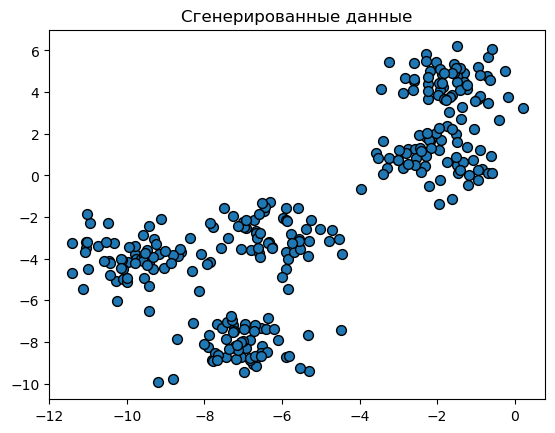

/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vadimlopatkin/opt/anaconda3/envs/qml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

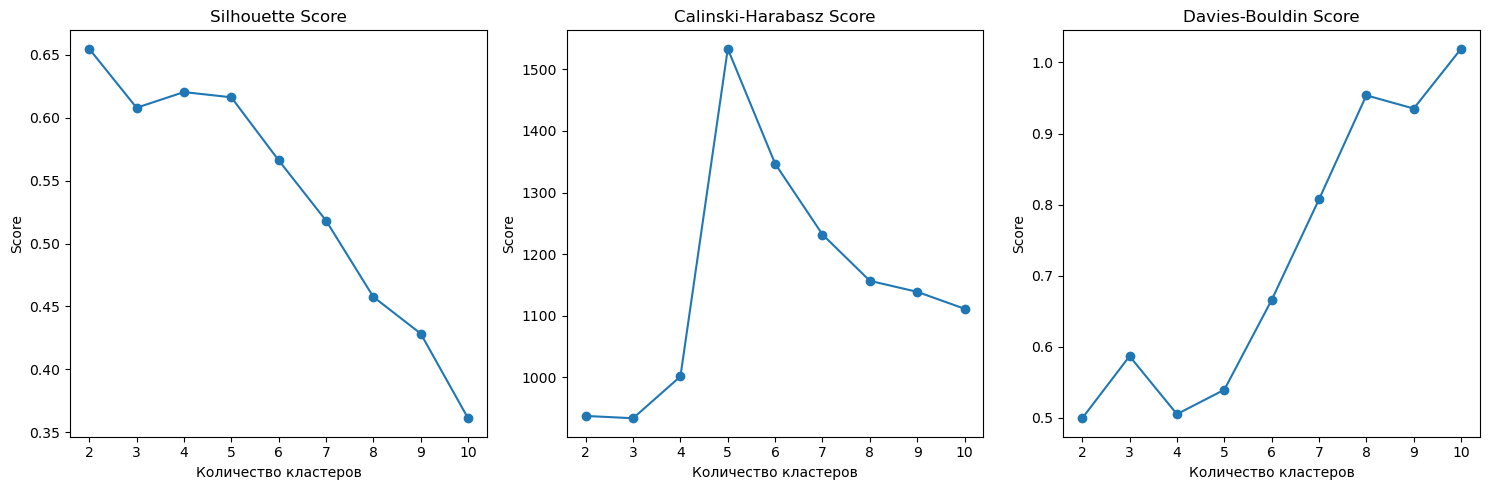

best Silhouette: 2
best Calinski-Harabasz: 5
best Davies-Bouldin: 2


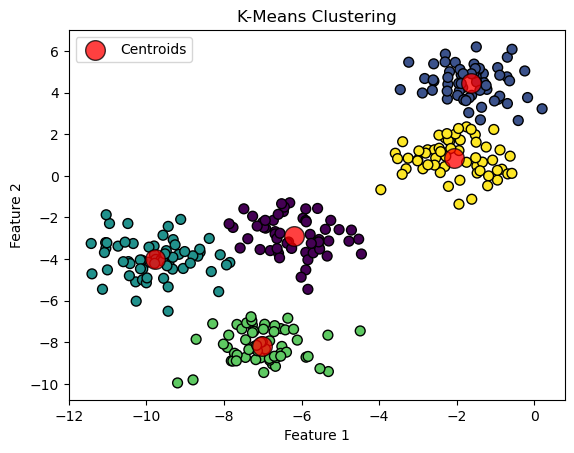

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Генерация случайного датасета
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.title("Сгенерированные данные")
plt.show()

k_values = range(2, 11)
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(X)
    
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))
    davies_scores.append(davies_bouldin_score(X, labels))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Количество кластеров")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_scores, marker='o')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Количество кластеров")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_scores, marker='o')
plt.title("Davies-Bouldin Score")
plt.xlabel("Количество кластеров")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

best_k_silhouette = k_values[np.argmax(silhouette_scores)]
best_k_calinski = k_values[np.argmax(calinski_scores)]
best_k_davies = k_values[np.argmin(davies_scores)]

print("best Silhouette:", best_k_silhouette)
print("best Calinski-Harabasz:", best_k_calinski)
print("best Davies-Bouldin:", best_k_davies)

